In [11]:
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier  ,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import feature
import pandas as pd
from collections import defaultdict
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle
import matplotlib.pyplot as plt

In [2]:
Xtr=np.loadtxt("TrainData.csv") 
Xts=np.loadtxt("TestData.csv") 
Ytr=np.loadtxt("TrainLabels.csv") 
print(Ytr.shape)
print(Xtr.shape)
print(Xts.shape)

(12000,)
(12000, 784)
(2000, 784)


In [8]:
#Canny
def Extract_Features_canny(examples,sig):
    lst=[]
    for image in examples:
        #edges1 = feature.canny(image.reshape(28,28))
        edges2 = feature.canny(image.reshape(28,28), sigma=sig)
        arr=np.array(edges2)
        arr=arr.reshape(-1)
        lst.append(arr)
    return lst
vectors=Extract_Features_canny(Xtr,1) 
print(Xtr.shape)

(12000, 784)


In [3]:
#HOG
def Extract_Features_Hog(examples,o,c,b):
    lst=[]
    for image in examples:
        fd, hog_image = hog(image.reshape(28,28), orientations=o, pixels_per_cell=(c, b), cells_per_block=(c, b), visualize=True, multichannel=False)
        arr=np.array(hog_image)
        arr=arr.reshape(-1)
        lst.append(arr)
    return lst
vectors=Extract_Features_Hog(Xtr,9,2,2) 
print(Xtr.shape)

(12000, 784)


In [18]:
print(np.array(vectors).shape)
print(Ytr.shape)
X_train, X_test, y_train, y_test = train_test_split(np.array(vectors), Ytr, test_size=0.33, random_state=42)
print(X_train.shape[0])
print(X_test.shape)

(12000, 784)
(12000,)
10680
(1320, 784)


0.8045454545454546


Text(0.5, 1.0, 'First 100 actual and Predicted values')

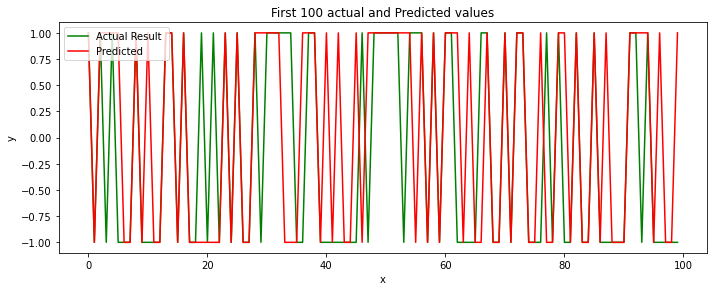

In [24]:
svm_clf = make_pipeline(StandardScaler(), SVC(C=5,gamma='auto'))
svm_clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=6,gamma='auto'))])
y_pred=svm_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot( np.arange(100),y_test[0:100],'g', label="Actual Result ")
axes.plot( np.arange(100),y_pred[0:100],'r', label="Predicted")
axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')

0.8174242424242424


Text(0.5, 1.0, 'First 100 actual and Predicted values')

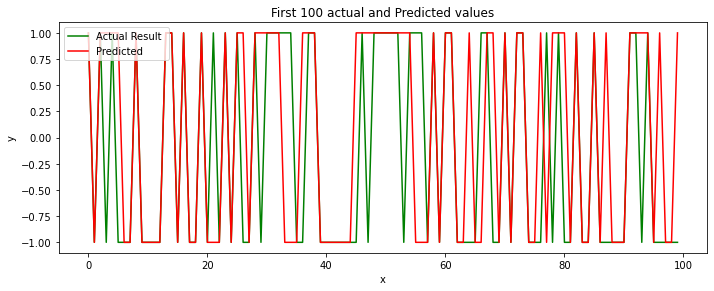

In [25]:
rf = RandomForestClassifier(n_estimators=171)
rf2 = rf.fit(X_train, y_train) 
y_pred=rf2.predict(X_test)
print(accuracy_score(y_test, y_pred))
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot( np.arange(100),y_test[0:100],'g', label="Actual Result ")
axes.plot( np.arange(100),y_pred[0:100],'r', label="Predicted")
axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')

0.7659090909090909


Text(0.5, 1.0, 'First 100 actual and Predicted values')

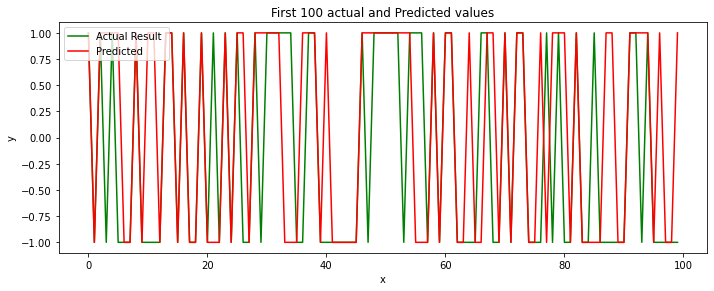

In [21]:
adaboost=AdaBoostClassifier(n_estimators=42)
adaboost2 = adaboost.fit(X_train, y_train)
y_pred=adaboost2.predict(X_test)
print(accuracy_score(y_test, y_pred))
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot( np.arange(100),y_test[0:100],'g', label="Actual Result ")
axes.plot( np.arange(100),y_pred[0:100],'r', label="Predicted")
axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')

In [26]:
rf = RandomForestClassifier(n_estimators=267)
rf2 = rf.fit(Xtr, Ytr)  
with open("myModel.pkl", 'wb') as file:  
    pickle.dump(rf2, file)